%md
---
Author: Mustapha Bouhsen <br>
Email : mustapha.bouhsen@habitat-nature.com <br>
Date: July 31, 2024<br>
---

In [0]:
%run ../data_manager/utility_functions

In [0]:
#%matplotlib inline

In [0]:
#######################
# Seting the root paths
#######################
raw_folder_path = "/mnt/database/raw/"
prod_folder_path = "/mnt/database/prod/"
driver_path = "file:/databricks/driver/"

In [0]:
files_paths = get_files_paths_from_folders(raw_folder_path, [".shp"])

In [0]:
files_paths[0]

Out[29]: '/dbfs/mnt/database/raw/admin-region/canada_btsl_btsl-delimitations_2022.shp'

In [0]:
import matplotlib.pyplot as plt

In [0]:
gdf = gpd.read_file(files_paths[0])

Out[32]:

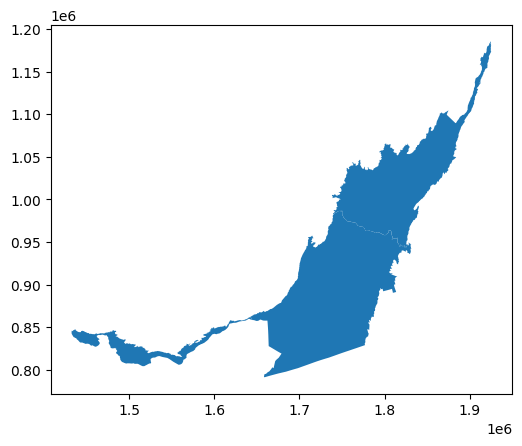

<AxesSubplot:>

In [0]:
gdf.plot()

In [0]:
def historical_shape_process():
    try:
        print('Processing historical tif files START')
        print("-------------------------------------")
        files_paths = get_files_paths_from_folders(raw_folder_path, [".tif"])
        output_file = "temp_cog_file.tif"

        for input_file in files_paths:
            prod_file_path = build_prod_file_path(input_file, prod_folder_path, extention="_cog.tif")
            convert_tif_to_cog(input_file, output_file)
            dbutils.fs.mv(f'{driver_path}{output_file}', dest_path)
                   
        print('Files Processed')
    except Exception as error:
        print(error)

In [0]:
#historical_tif_process()